In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
dt = datasets.load_digits()

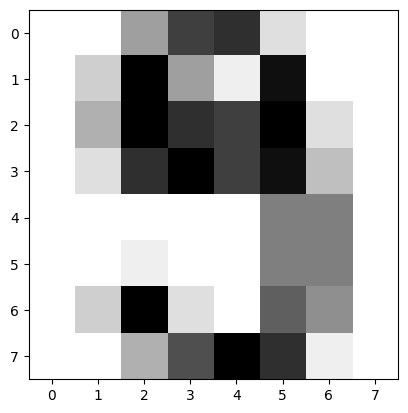

In [ ]:
plt.imshow(dt.images[1020], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x = dt.data
y = dt.target
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain, yTrain)

print("Accuracy: {0}".format(knn.score(xTest, yTest)))

Accuracy: 0.9861111111111112


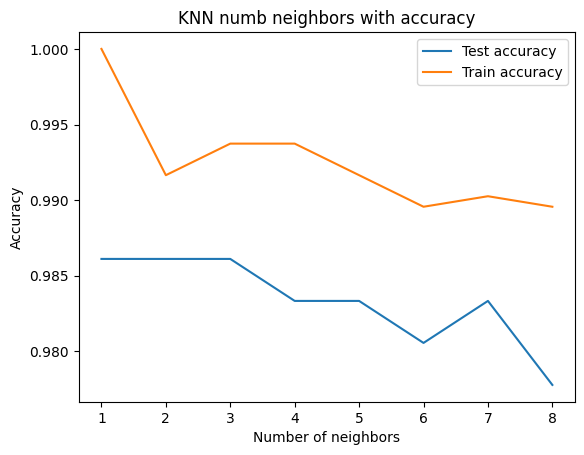

In [ ]:
nb = np.arange(1,9)
train_acc = np.empty(len(nb))
test_acc = np.empty(len(nb))

for i, k in enumerate(nb):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xTrain, yTrain)
  train_acc[i] = knn.score(xTrain, yTrain)
  test_acc[i] = knn.score(xTest, yTest)

plt.title('KNN numb neighbors with accuracy')
plt.plot(nb, test_acc, label='Test accuracy')
plt.plot(nb, train_acc, label='Train accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from __future__ import print_function as pf 
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 70080557.54it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7356269.74it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35784314.86it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13925825.12it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
print("Number of training examples", mnist.train_data.shape)
print("Image info", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image info (<PIL.Image.Image image mode=L size=28x28 at 0x7F05BD745960>, 5)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


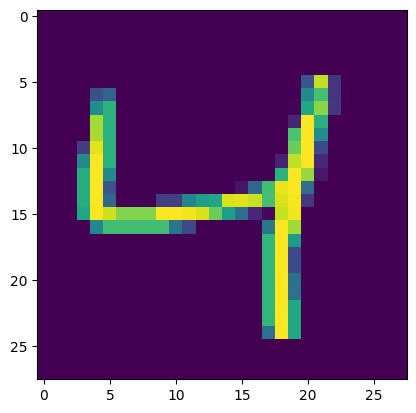

In [ ]:
%matplotlib inline
plt.imshow(mnist[2][0])

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fully = nn.Sequential(nn.Linear(28*28, 10))

  def forward(self, x):
    x = x.view([-1, 28*28])
    x = self.fully(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [ ]:
def train():
  learn_rate = 1e-3
  num_epochs = 3
  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learn_rate)

  for ep in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      out = net(data)
      loss = F.nll_loss(out, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
        print('Epoch = %f. Batch = %s Loss= %s' % (ep, batch_idx, loss.item()))
  return net

In [ ]:
net = train()

Epoch = 0.000000. Batch = 0 Loss= 2.306335926055908
Epoch = 0.000000. Batch = 100 Loss= 0.782660186290741
Epoch = 0.000000. Batch = 200 Loss= 0.5706815123558044
Epoch = 0.000000. Batch = 300 Loss= 0.5187137126922607
Epoch = 0.000000. Batch = 400 Loss= 0.5264878869056702
Epoch = 0.000000. Batch = 500 Loss= 0.6303940415382385
Epoch = 0.000000. Batch = 600 Loss= 0.42082294821739197
Epoch = 0.000000. Batch = 700 Loss= 0.5145255327224731
Epoch = 0.000000. Batch = 800 Loss= 0.4254870116710663
Epoch = 0.000000. Batch = 900 Loss= 0.4828716516494751
Epoch = 1.000000. Batch = 0 Loss= 0.18483828008174896
Epoch = 1.000000. Batch = 100 Loss= 0.29119357466697693
Epoch = 1.000000. Batch = 200 Loss= 0.307544469833374
Epoch = 1.000000. Batch = 300 Loss= 0.24985012412071228
Epoch = 1.000000. Batch = 400 Loss= 0.3715318441390991
Epoch = 1.000000. Batch = 500 Loss= 0.32218748331069946
Epoch = 1.000000. Batch = 600 Loss= 0.2069595456123352
Epoch = 1.000000. Batch = 700 Loss= 0.5253402590751648
Epoch = 1.00

In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0
for data, target in test_loader:
  total += len(target)
  out = net(data)
  pred = out.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct = %s" % total, correct.item())
print("Accuracy ", correct.item()*100/10000.)

Correct = 10000 9215
Accuracy  92.15


In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/lab4-datamining/gapminder.csv')

<ipython-input-26-53fb9a55035b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='rocket_r')


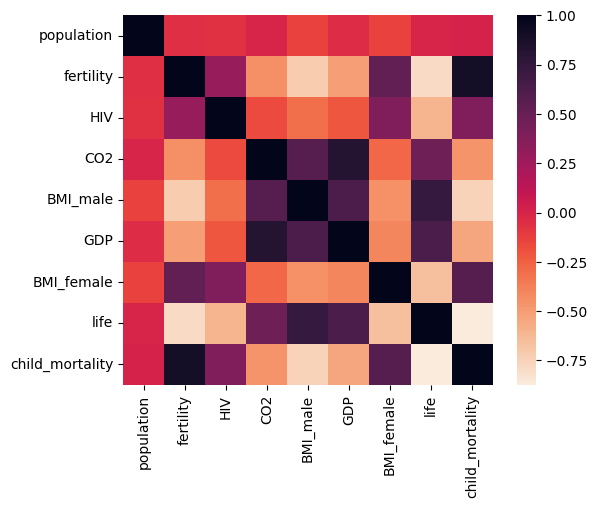

In [ ]:
ax = sns.heatmap(df.corr(), square=True, cmap='rocket_r')
plt.show()

accuracy 0.6162438752151917


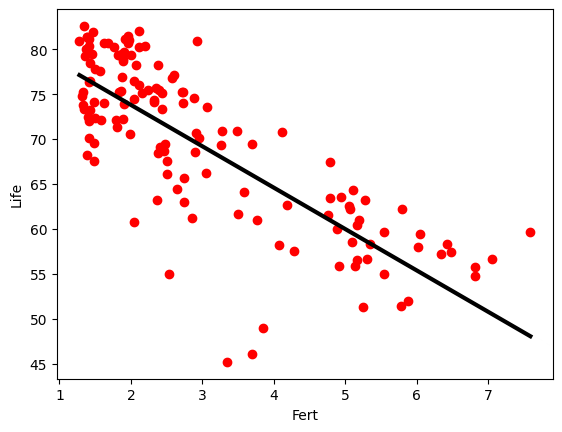

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xFert = df['fertility'].values.reshape(-1,1)
yLife = df['life'].values.reshape(-1,1)
pred_space = np.linspace(min(xFert), max(xFert)).reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(xFert, yLife, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(xTrain, yTrain)
yPredict = reg.predict(pred_space)

print("accuracy", reg.score(xFert, yLife))

plt.scatter(xFert, yLife, color='red')
plt.plot(pred_space, yPredict, color='black', linewidth=3)
plt.ylabel('Life')
plt.xlabel('Fert')
plt.show()

In [ ]:
fts = df.copy()
del fts['life']
del fts['Region']
yLife = df['life'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(fts, yLife, test_size=0.3, random_state=42)



In [ ]:
reg_all = LinearRegression()
reg_all.fit(xTrain, yTrain)
print('Accuracy', reg_all.score(fts, yLife))

Accuracy 0.8914651485793176


In [ ]:
n = 10
m = .9
c = 1
x = np.linspace(0,2*np.pi, n)
y = m*x + c + np.random.normal(0, .3, x.shape)

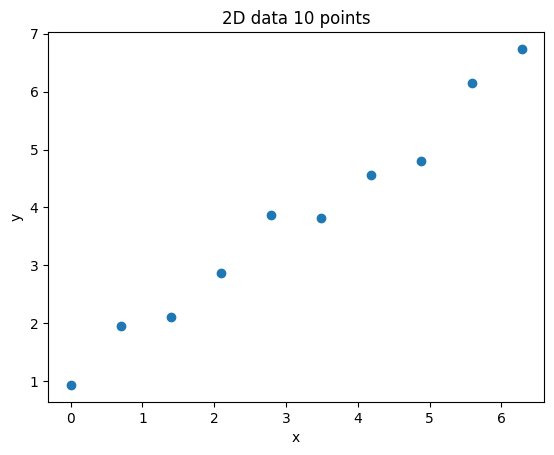

In [ ]:
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data 10 points')
plt.show()

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)
    
  def __getitem__(self, idx):
    sample = {
        'feature': torch.tensor([1, self.x[idx]]),
        'label': torch.tensor([self.y[idx]])
    }
    return sample

In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  samp = dataset[i]
  print(i, samp['feature'], samp['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.9380], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.9545], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.1126], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.8742], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.8700], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.8168], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.5535], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([4.7996], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.1413], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.7361], dtype=torch.float64)


In [ ]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers = 4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import pprint as pp
for i_batch, sample in enumerate(dataloader):
  print('\nbatch# %s' % i_batch)
  print('samples: ')
  pp.pprint(sample)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



batch# 0
samples: 
{'feature': tensor([[1.0000, 0.0000],
        [1.0000, 5.5851],
        [1.0000, 1.3963],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[0.9380],
        [6.1413],
        [2.1126],
        [3.8700]], dtype=torch.float64)}

batch# 1
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 2.0944],
        [1.0000, 4.1888],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[4.7996],
        [2.8742],
        [4.5535],
        [3.8168]], dtype=torch.float64)}

batch# 2
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 6.2832]], dtype=torch.float64),
 'label': tensor([[1.9545],
        [6.7361]], dtype=torch.float64)}


In [ ]:
class MyModel(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(MyModel, self).__init__()
    self.linear = nn.Linear(in_dim, out_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
model = MyModel(2, 1)
cost = nn.MSELoss()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(x.dtype)
x = np.float32(x)
print(x.dtype)

float64
float32


In [ ]:
print(y.dtype)
y = np.float32(y)
print(y.dtype)

float64
float32


Must cast x, y to float32. Default numpy random get float64

In [ ]:
dataset = MyDataset(x,y)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
for ep in range(n):
  print('Epoch = %s' % ep)

  for batch_index, sample in enumerate(dataloader):
    predict = model(sample['feature'])
    error = cost(predict, sample['label'])
    print('\tBatch = %s, Err = %s' % (batch_index, error.item()))
    optimizer.zero_grad()
    error.backward()
    optimizer.step()

Epoch = 0
	Batch = 0, Err = 13.316856384277344
	Batch = 1, Err = 7.872308731079102
	Batch = 2, Err = 8.885517120361328
Epoch = 1
	Batch = 0, Err = 2.004911422729492
	Batch = 1, Err = 0.3017258644104004
	Batch = 2, Err = 0.19993950426578522
Epoch = 2
	Batch = 0, Err = 0.3136731684207916
	Batch = 1, Err = 0.22054605185985565
	Batch = 2, Err = 0.028409678488969803
Epoch = 3
	Batch = 0, Err = 0.2931939661502838
	Batch = 1, Err = 0.058314282447099686
	Batch = 2, Err = 0.04049588739871979
Epoch = 4
	Batch = 0, Err = 0.09301021695137024
	Batch = 1, Err = 0.1369442343711853
	Batch = 2, Err = 0.23226793110370636
Epoch = 5
	Batch = 0, Err = 0.10677196085453033
	Batch = 1, Err = 0.12841735780239105
	Batch = 2, Err = 0.2313845455646515
Epoch = 6
	Batch = 0, Err = 0.19020269811153412
	Batch = 1, Err = 0.11957370489835739
	Batch = 2, Err = 0.020689144730567932
Epoch = 7
	Batch = 0, Err = 0.16555872559547424
	Batch = 1, Err = 0.11888346076011658
	Batch = 2, Err = 0.053627584129571915
Epoch = 8
	Batch

In [ ]:
x_for_plot = np.linspace(0, 2*np.pi, 1000)
matrix = torch.tensor(np.vstack([np.ones(x_for_plot.shape), x_for_plot]).T, dtype=torch.float32)
print('Desgin matrix shape: ', matrix.shape)

y_for_plot = model.forward(matrix)
print('Y shape: ', y_for_plot.shape)



Desgin matrix shape:  torch.Size([1000, 2])
Y shape:  torch.Size([1000, 1])


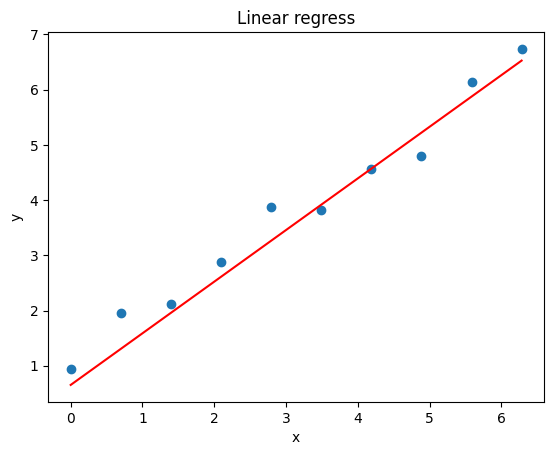

In [ ]:
plt.figure()
plt.plot(x,y, 'o')
plt.plot(x_for_plot, y_for_plot.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regress')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = datasets.load_iris()

In [5]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

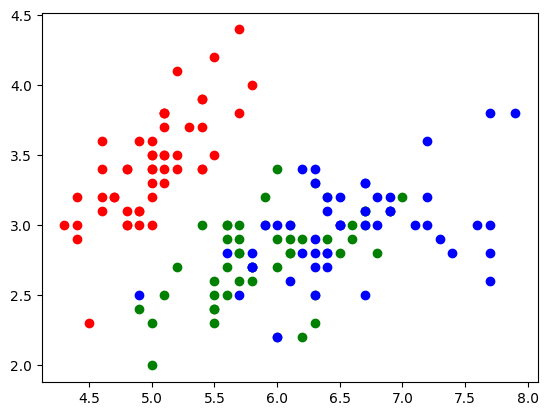

In [6]:
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro")
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go")
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo")


In [10]:
import random
def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2-p1, 2))) 

def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
           vote_counts[vote]+= 1
        else:
            vote_counts[vote]= 1
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

In [11]:
import scipy.stats as ss
def majority_vote_short(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def find_nearest_neighbours(p, points, k = 5):  #algorithm to find the nearest neighbours
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]= distance(p, points[i])
    ind = np.argsort(distances)      #returns index, according to sorted values in array
    return ind[:k]

In [12]:
def knn_predict(p, points, outcomes, k = 5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

In [13]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
 
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [14]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red", "blue", "green"])
    plt.figure(figsize =(10, 10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:, 0], predictors [:, 1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

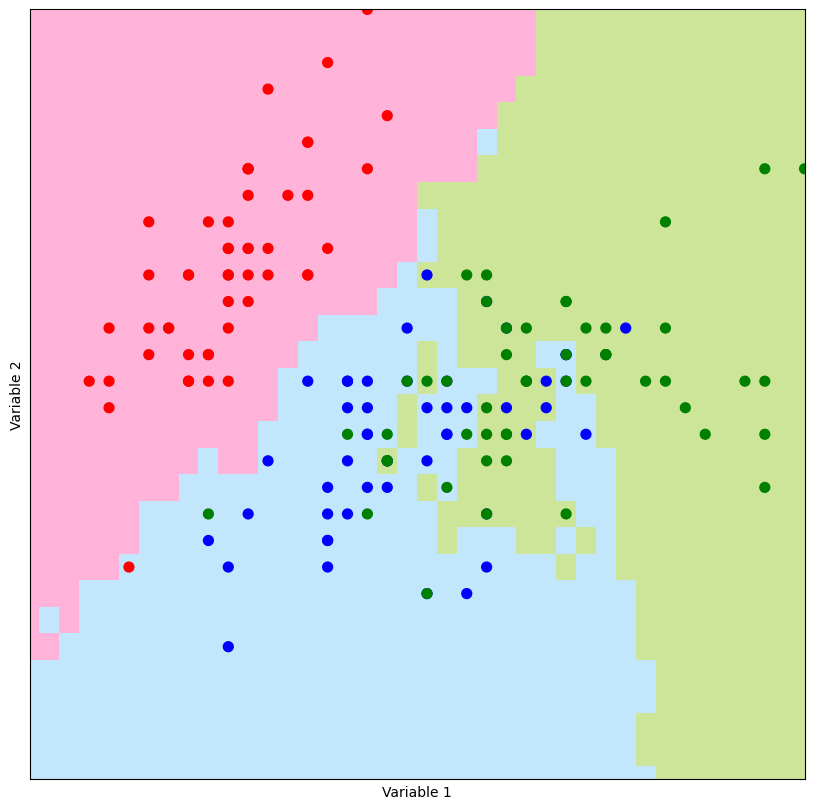

In [15]:
k = 5; filename ="iris_grid.pdf"; limits =(4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier #predictions from scikit
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

print(" prediction by scikit learn : ")
print(100 * np.mean(sk_predictions == outcomes))
print(" prediction by own model using k-NN: ")
print(100 * np.mean(my_predictions == outcomes)) 

 prediction by scikit learn : 
84.0
 prediction by own model using k-NN: 
84.66666666666667
